# Kaggle - [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/碩一下/Machine Learning/Homework_5') 
os.listdir()

In [3]:
!git clone https://github.com/sueshow/Kaggle.git

Cloning into 'Kaggle'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 35 (delta 5), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [ ]:
#若需要重新下載資料，先執行下面的語法：
#!rm -r /content/Kaggle

## 使用模型：Support Vector Machine (SVM) Algorithm

### Imporrt Package

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### Read the data and show the first 5 rows

In [4]:
df = pd.read_csv('/content/Kaggle/Content/Heart Disease UCI/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Exploratory Analysis

* There are thirteen features and one target as below:
  * age: The person's age in years
  * sex: The person's sex (1 = male, 0 = female)
  * cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
  * trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
  * chol: The person's cholesterol measurement in mg/dl
  * fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
  * restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
  * thalach: The person's maximum heart rate achieved
  * exang: Exercise induced angina (1 = yes; 0 = no)
  * oldpeak: ST depression induced by exercise relative to rest
  * slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
  * ca: The number of major vessels (0-3)
  * thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
  * target: Heart disease (0 = no, 1 = yes)

### Check for missing values and basic informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
               .background_gradient(subset=['std'], cmap='Reds')\
               .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


* Cholesterol has the highest mean value of 246.26 & also he highest standard deviation of 51.83

### Data Exploration

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

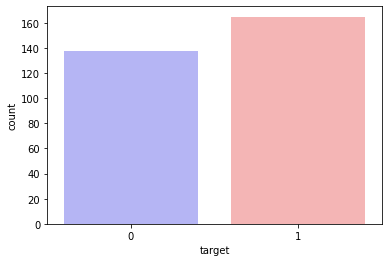

In [9]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [10]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print('Percentage of Patients Have Heart Disease: {:.2f}%'.format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


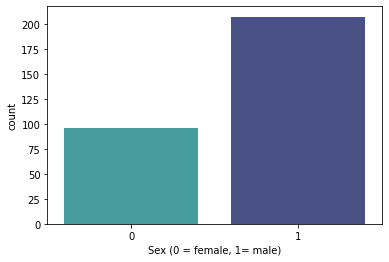

In [11]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex (0 = female, 1= male)')
plt.show()

In [12]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print('Percentage of Female Patients: {:.2f}%'.format((countFemale / (len(df.sex))*100)))
print('Percentage of Male Patients: {:.2f}%'.format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


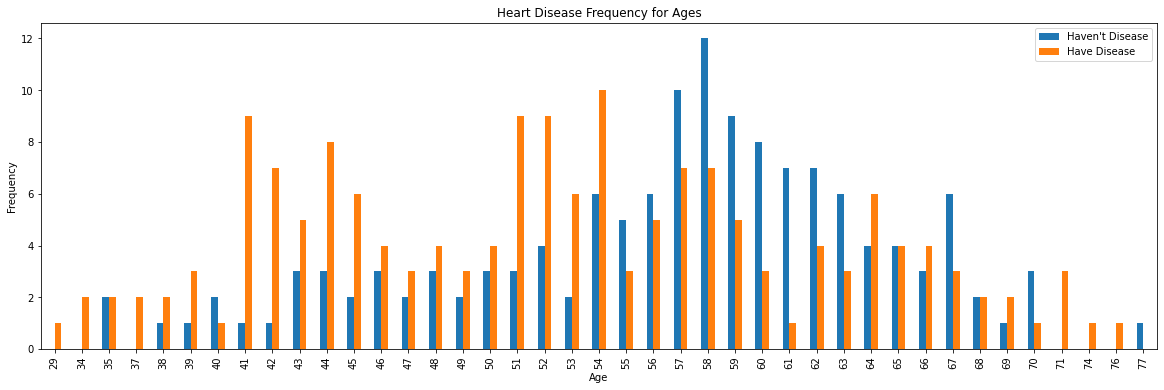

In [14]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

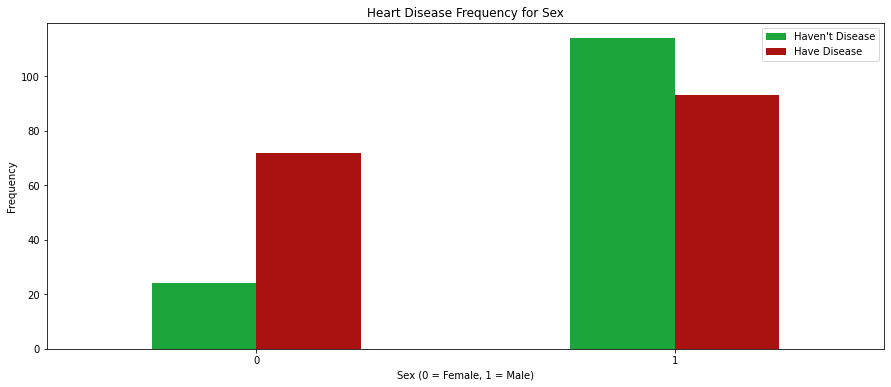

In [15]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6), color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

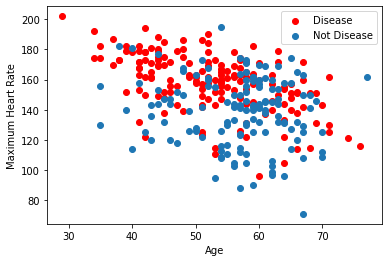

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

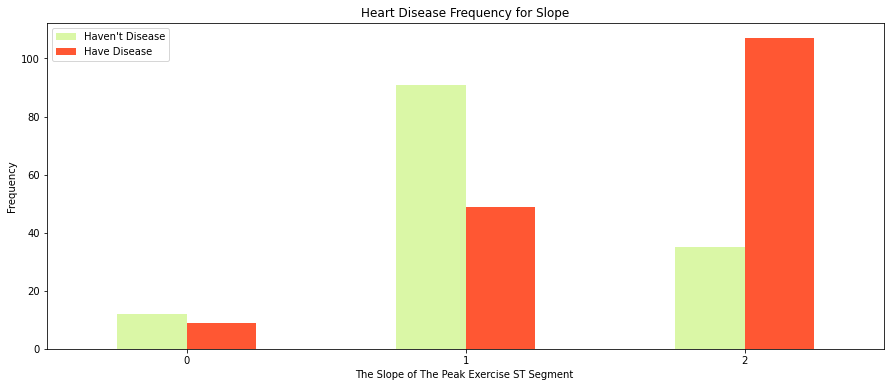

In [17]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,6), color=['#DAF7A6', '#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

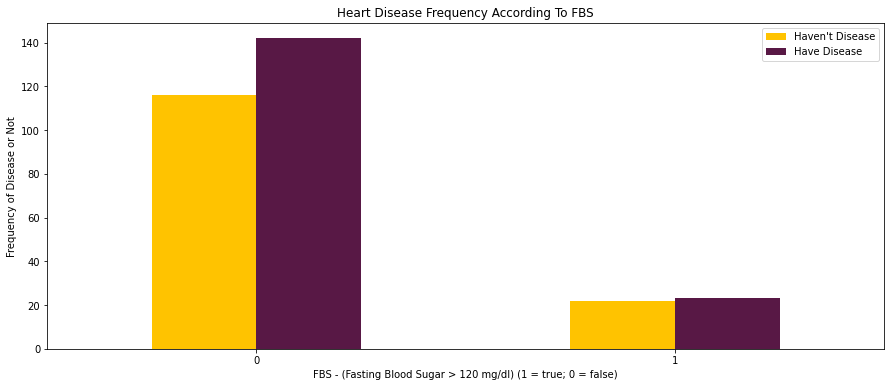

In [18]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15,6), color=['#FFC300', '#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

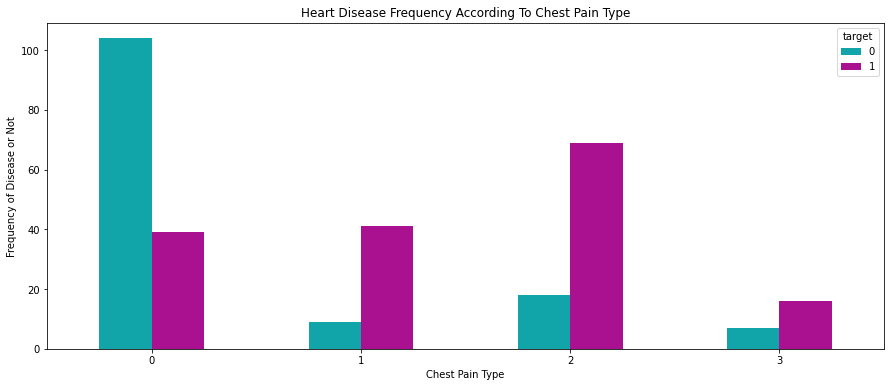

In [19]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15,6), color=['#11A5AA', '#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

* 一起觀察

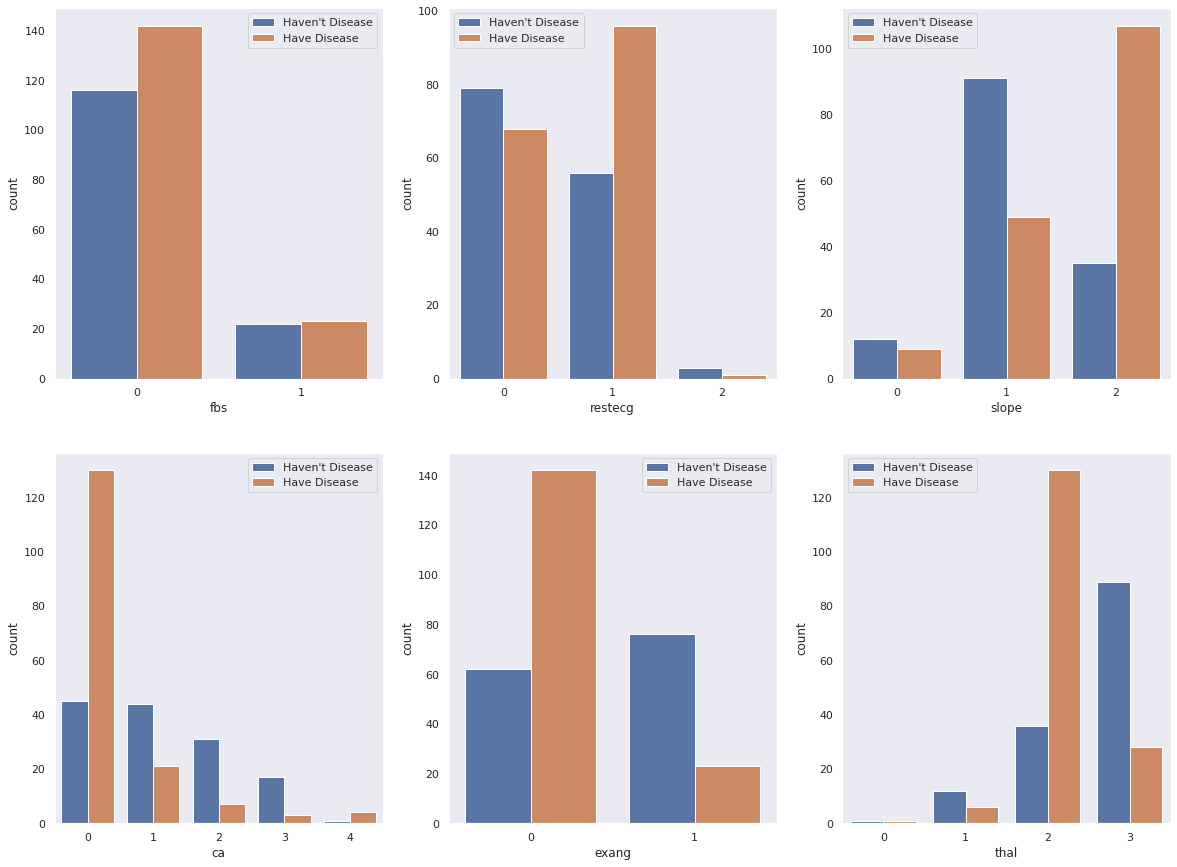

In [20]:
plt.figure(figsize=(20,15))
sns.set_theme(style='dark')

plt.subplot(2,3,1)
sns.countplot(data=df, x='fbs', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,2)
sns.countplot(data=df, x='restecg', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,3)
sns.countplot(data=df, x='slope', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,4)
sns.countplot(data=df, x='ca', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,5)
sns.countplot(data=df, x='exang', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])

plt.subplot(2,3,6)
sns.countplot(data=df, x='thal', hue='target')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

* This plot depicts an important relationship.
  * For example, in the 1st subplot of "fbs", it says that when fbs is zero, the target value zero is about 120 and target value 1 is 140, again when fbs is one, the target value for zero is about 20 and target value for one is just above 20.

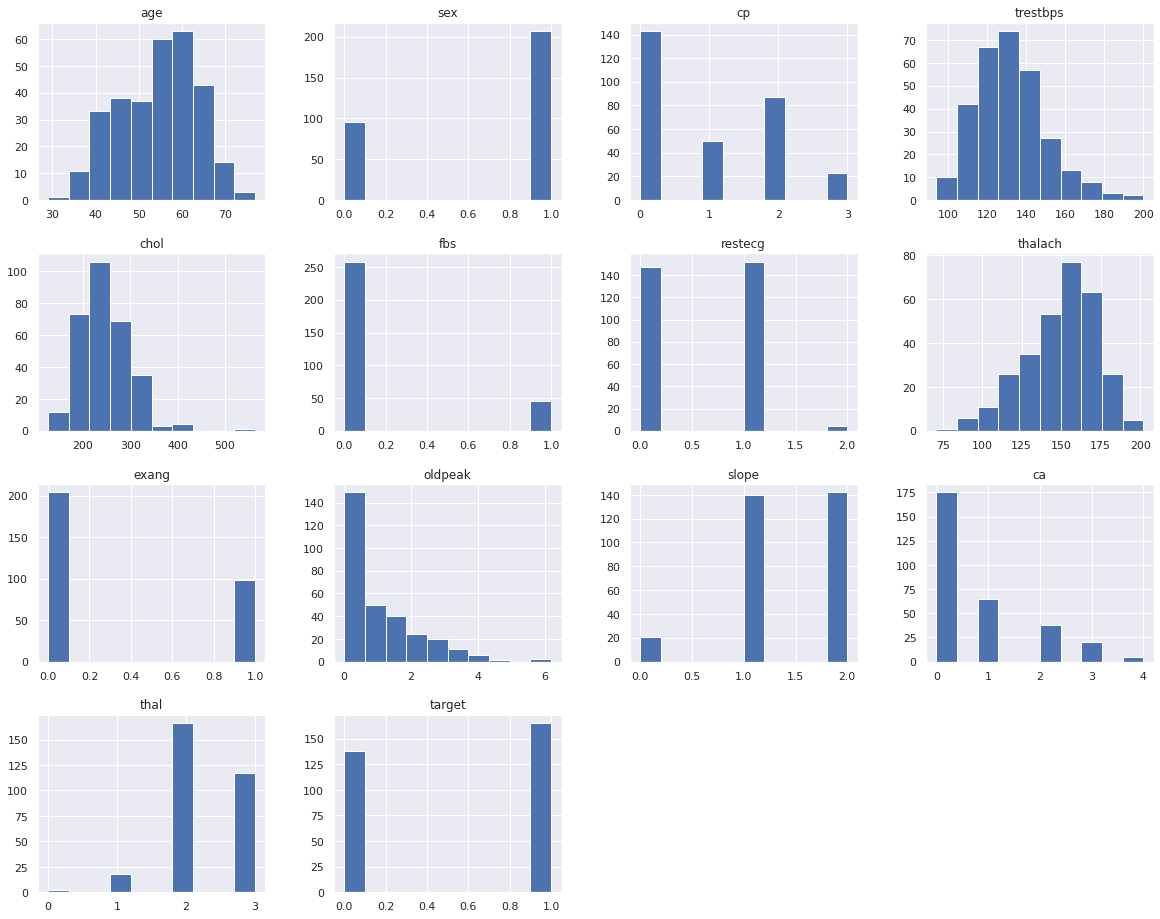

In [21]:
df.hist(figsize=(20,16))
plt.show()

* This also depicts the counts of each value of each column. Here we can see the imblances in data too.
  * For example the fbs column has around 250 zero values, and about 20 one values.

#### Box Plot

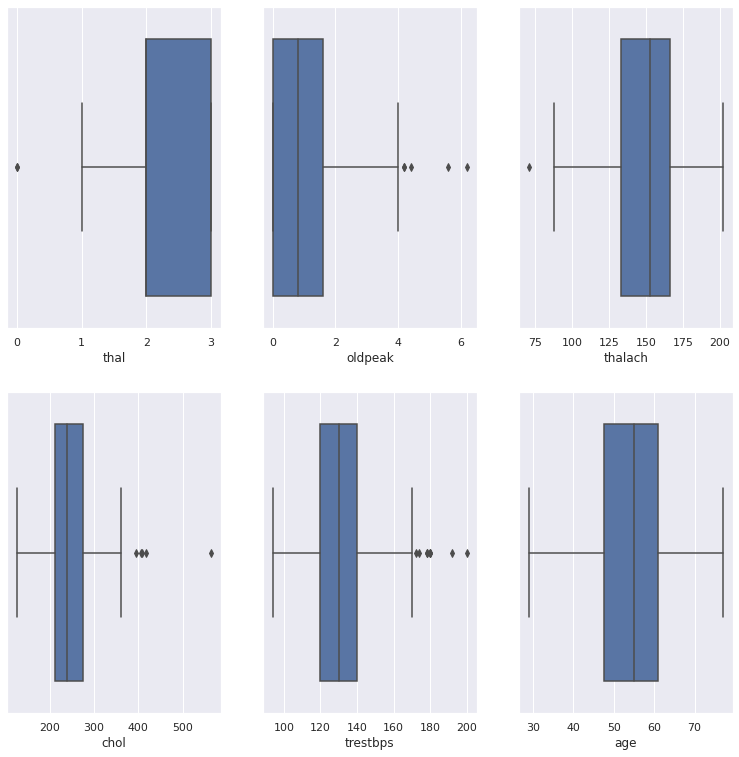

In [22]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')

plt.subplot(2,3,1)
sns.boxplot(x='thal', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='oldpeak', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='thalach', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='chol', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='trestbps', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='age', data=df)
plt.show()

In [23]:
import plotly.express as px

fig = px.box(df, y='trestbps')
fig.show()

#### Heat Map

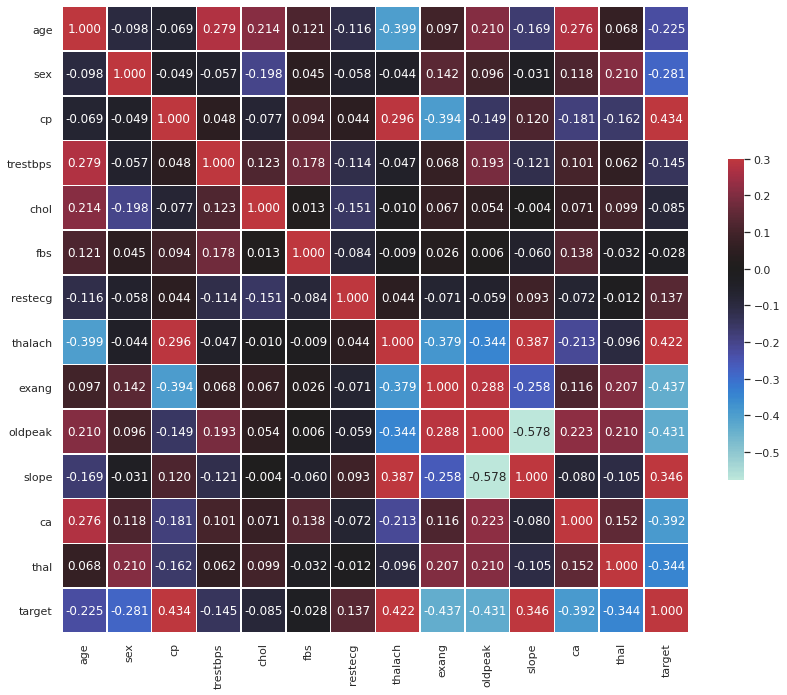

In [24]:
plt.figure(figsize=(12,10))
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.corr(), vmax=.3, center=0, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()
plt.show()

* slope and old peak has high negative correlation of -0.58. This means if slope value increases then old peak will decrease and vice versa.
* Target and cp(chest pain) has the highest positive correlation of 0.43.

### Creating Dummy Variables

* Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [25]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [26]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [27]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


### Scaling after train_test_split

In [30]:
X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#transpose matrices
X_train = X_train.T 
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

### Model

In [32]:
accuracies = {}
svm = SVC(random_state = 1)

In [86]:
svm.fit(X_train.T, y_train.T)

acc = svm.score(X_test.T,y_test.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 86.96%


In [78]:
# Predicted values
y_head_svm = svm.predict(X_test.T)

In [98]:
# Confusion  Matrix
cm_svm = confusion_matrix(y_test, y_head_svm)
print(classification_report(y_head_svm, y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.89      0.89      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.87      0.87      0.87        46



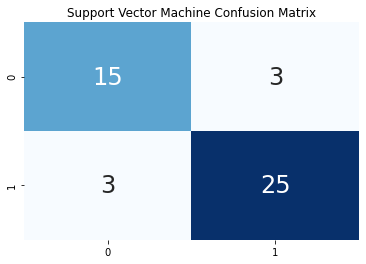

In [80]:
plt.figure()
plt.title('Support Vector Machine Confusion Matrix')
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

#### GridSearchCV

In [ ]:
from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [100]:
params = {
    'gamma':[0.1,0.01,0,0.001,0.0001],
    'C':[0.1,10,100,1000],
    'kernel':['rbf']
}
grid = GridSearchCV(svm, param_grid=params, scoring=make_scorer(f1_score))

In [102]:
grid_svm = grid.fit(X_train.T, y_train)

In [103]:
grid_svm.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [104]:
grid_best = grid_svm.best_estimator_

In [106]:
y_grid_pred = grid_best.predict(X_test.T)

In [107]:
print(confusion_matrix(y_grid_pred,y_test))
print(classification_report(y_grid_pred,y_test))

[[16  5]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.82      0.92      0.87        25

    accuracy                           0.85        46
   macro avg       0.86      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46



###  More Model

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
# GridSearchCV
#from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
#from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [36]:
models = []
models.append(['RidgeClassifier', RidgeClassifier()])
models.append(['XGBClassifier', XGBClassifier(use_label_encoder=False, objective='binary:logistic', random_state=0, eval_metric='logloss')])
models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeigbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['DecisionTree', DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest', RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier()])
models.append(['MLPClassifier', MLPClassifier(random_state=42, max_iter=1000)])
models.append(['ExtraTreesClassifier', ExtraTreesClassifier()])
#models.append(['CatBoostClassifier', CatBoostClassifier(eval_metric='AUC', verbose=0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier()])
models.append(['SGDClassifier', SGDClassifier()])

In [40]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train.T, y_train)
    y_pred = model.predict(X_test.T)
    cm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator= model, X=X_train.T, y=y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test, y_pred)
    
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ', accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test, y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(roc)
    lst_1.append(lst_2)

RidgeClassifier :
[[15  3]
 [ 4 24]]
Accuracy Score:  0.8478260869565217

K-Fold Validation Mean Accuracy: 82.55 %

ROC AUC Score: 0.85
----------------------------------------

XGBClassifier :
[[15  3]
 [ 6 22]]
Accuracy Score:  0.8043478260869565

K-Fold Validation Mean Accuracy: 81.29 %

ROC AUC Score: 0.81
----------------------------------------

Logistic Regression :
[[16  2]
 [ 4 24]]
Accuracy Score:  0.8695652173913043

K-Fold Validation Mean Accuracy: 82.52 %

ROC AUC Score: 0.87
----------------------------------------

SVM :
[[15  3]
 [ 3 25]]
Accuracy Score:  0.8695652173913043

K-Fold Validation Mean Accuracy: 81.38 %

ROC AUC Score: 0.86
----------------------------------------

KNeigbors :
[[14  4]
 [ 6 22]]
Accuracy Score:  0.782608695652174

K-Fold Validation Mean Accuracy: 81.80 %

ROC AUC Score: 0.78
----------------------------------------

GaussianNB :
[[15  3]
 [ 5 23]]
Accuracy Score:  0.8260869565217391

K-Fold Validation Mean Accuracy: 78.26 %

ROC AUC Score: 0

In [41]:
df2 = pd.DataFrame(lst_1,columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'ROC_AUC'])

df2.sort_values(by=['ROC_AUC'], inplace=True, ascending=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,ROC_AUC
2,Logistic Regression,86.956522,82.523077,0.873016
3,SVM,86.956522,81.384615,0.863095
6,BernoulliNB,84.782609,85.246154,0.855159
11,ExtraTreesClassifier,86.956522,82.169231,0.853175
0,RidgeClassifier,84.782609,82.553846,0.845238
8,RandomForest,84.782609,81.753846,0.845238
10,MLPClassifier,84.782609,75.476923,0.835317
5,GaussianNB,82.608696,78.261538,0.827381
1,XGBClassifier,80.434783,81.292308,0.809524
12,GradientBoostingClassifier,80.434783,82.492308,0.809524


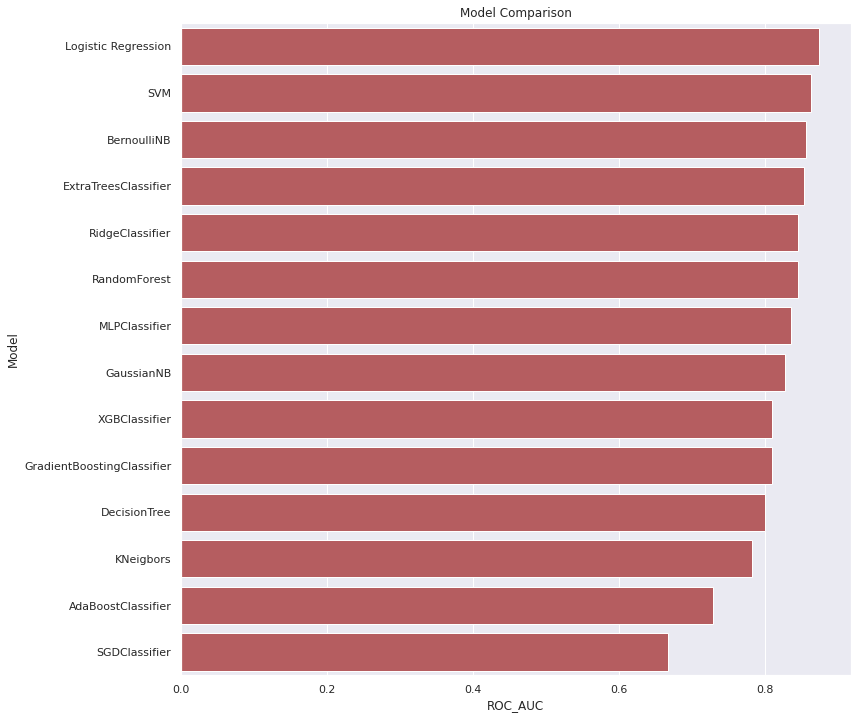

In [42]:
fig = plt.figure(figsize=(12,12))
sns.barplot(x='ROC_AUC', y='Model', data=df2, color='r')
plt.title('Model Comparison');

In [43]:
grid_models = [
               (KNeighborsClassifier(), [{'n_neighbors':np.arange(1, 100), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(), [{'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4]}]), 
               (RandomForestClassifier(), [{'n_estimators':[100,150,200],'criterion':['gini','entropy'], 'min_samples_leaf':[2, 10, 30]}]),
               (MLPClassifier(max_iter=1000),[{'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive']}]), 
               (RidgeClassifier(), [{'alpha':[0.1,0.5,1], 'solver':['auto', 'svd', 'cholesky']}]),
               (GaussianNB(), [{'var_smoothing':np.logspace(0, -9, num=100)}]),
               (XGBClassifier(use_label_encoder=False), [{'learning_rate':[0.01, 0.05, 0.1], 'eval_metric':['error', 'logloss']}])
               ]

In [45]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid=j, scoring='roc_auc', cv=5)
    grid.fit(X_train.T, y_train)
    best_score = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best score: {:.1f} %'.format(i, best_score*100))
    print('')
    print('-'*25)
    print('')

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): 
 Best score: 91.5 %

-------------------------

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): 
 Best score: 82.9 %

-------------------------

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=N

* Top performing model is KNeighborsClassifier and then MLPClassifier.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

In [ ]:
svm_model = SVC(kernel='rbf', class_weight='balanced',probability=True)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

grid_search = GridSearchCV(estimator=svm_model,param_grid=param_grid, verbose=10,cv=10)
grid_search.fit(X_train,Y_train)

print("best params:{}".format(grid_search.best_params_, grid_search.best_score_))
final_model = grid_search.best_estimator_

In [ ]:
# Y_pred = final_model.predict(X_test)
# print(classification_report(Y_test, Y_pred))
final_model.score(X_test, Y_test)

## 參考資料

* [Kaggle](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning)
* [Box Plots in Python](https://plotly.com/python/box-plots/)